In [2]:
#Testing our error class

In [ ]:
import numpy as np
def cross_entropy_error(y_hat, y):
    batch_size = 1 if y_hat.ndim == 1 else y_hat.shape[0]
    return -np.sum(y*np.log(y_hat + 1e-7))/batch_size

In [4]:
y_hat_batch = np.array([ [0.2, 0.2, 0.3, 0.1, 0.2], [0.1, 0.1, 0.1, 0.1, 0.6]])
y_batch =     np.array([ [0,   0,   1,   0,    0],   [0,   0,   0,   0,   1]])

In [5]:
cross_entropy_error(y_hat_batch, y_batch)

0.8573989640459981

For activation class

In [8]:
def sigmoid(x):
        return 1/(1 + np.exp(-x))

In [9]:
sigmoid(100)

1.0

In [10]:
def softmax(x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T 

        x = x - np.max(x)  
        return np.exp(x) / np.sum(np.exp(x))

In [16]:
x = np.array([2.0, 1.0, 0.1])
softmax(x)

array([0.65900114, 0.24243297, 0.09856589])

#Testing layers class

In [ ]:
import numpy as np
from layers import Relu,Sigmoid,Affine,SoftmaxWithLoss
# Test data
np.random.seed(0)  # For reproducibility
x = np.random.randn(16, 10)      # Input data (e.g., batch of 16 samples with 10 features each)
w = np.random.randn(10, 5)       # Weights for Affine layer (input_dim=10, output_dim=5)
b = np.random.randn(5)           # Biases for Affine layer (output_dim=5)
y_true = np.eye(5)[np.random.choice(5, 16)]  # One-hot encoded true labels for SoftmaxWithLoss

# Relu Layer Test
relu = Relu()
print("Testing Relu Forward:")
relu_out = relu.forward(x)
print("Relu forward output:\n", relu_out)

print("\nTesting Relu Backward:")
relu_grad = relu.backward(np.ones_like(relu_out))
print("Relu backward output:\n", relu_grad)

Testing Relu Forward:
Relu forward output:
 [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799 0.
  0.95008842 0.         0.         0.4105985 ]
 [0.14404357 1.45427351 0.76103773 0.12167502 0.44386323 0.33367433
  1.49407907 0.         0.3130677  0.        ]
 [0.         0.6536186  0.8644362  0.         2.26975462 0.
  0.04575852 0.         1.53277921 1.46935877]
 [0.15494743 0.37816252 0.         0.         0.         0.15634897
  1.23029068 1.20237985 0.         0.        ]
 [0.         0.         0.         1.9507754  0.         0.
  0.         0.77749036 0.         0.        ]
 [0.         0.3869025  0.         0.         0.         0.42833187
  0.06651722 0.3024719  0.         0.        ]
 [0.         0.         0.         0.         0.17742614 0.
  0.         0.46278226 0.         0.0519454 ]
 [0.72909056 0.12898291 1.13940068 0.         0.40234164 0.
  0.         0.         0.         0.05616534]
 [0.         0.90082649 0.46566244 0.         1.48825219 1.89588918
  1.1787

d:\hw-pattern\errors.py:8: RuntimeWarning: invalid value encountered in log
  return -np.sum(t*np.log(y + delta)) / batch_size


In [18]:
# Sigmoid Layer Test
sigmoid = Sigmoid()
print("\nTesting Sigmoid Forward:")
sigmoid_out = sigmoid.forward(x)
print("Sigmoid forward output:\n", sigmoid_out)

print("\nTesting Sigmoid Backward:")
sigmoid_grad = sigmoid.backward(np.ones_like(sigmoid_out))
print("Sigmoid backward output:\n", sigmoid_grad)



Testing Sigmoid Forward:
Sigmoid forward output:
 [[0.85371646 0.59872543 0.72685773 0.9038621  0.86617546 0.27343225
  0.72113296 0.46223277 0.47421817 0.60123138]
 [0.53594876 0.81065526 0.68157899 0.53038128 0.60917918 0.58265313
  0.81668973 0.44888958 0.57763388 0.29857439]
 [0.07222588 0.65782544 0.70358667 0.32253089 0.90634096 0.18933059
  0.51143763 0.4533402  0.82241258 0.8129599 ]
 [0.53865954 0.59342985 0.29156698 0.12123396 0.41388881 0.53900781
  0.77386945 0.76894787 0.40436098 0.42499465]
 [0.25950307 0.19465877 0.15364812 0.87553117 0.37527507 0.39219992
  0.22221662 0.68513898 0.16604815 0.44701462]
 [0.28998301 0.59553682 0.3750048  0.23493855 0.49295491 0.60547526
  0.51662318 0.57504668 0.34653116 0.41029617]
 [0.33794612 0.41106774 0.30722045 0.15106369 0.54424054 0.40088453
  0.16380319 0.613674   0.28755299 0.51298343]
 [0.67460567 0.5322011  0.75756959 0.22533791 0.59925013 0.33518859
  0.29508846 0.35919733 0.42273583 0.51403765]
 [0.23773279 0.71111932 0.614

In [19]:
# Affine Layer Test
affine = Affine(w, b)
print("\nTesting Affine Forward:")
affine_out = affine.forward(x)
print("Affine forward output:\n", affine_out)


Testing Affine Forward:
Affine forward output:
 [[ 1.8745361   0.49548017 -0.69506996 -6.31404678 -4.10424174]
 [ 1.52744623 -1.50692673 -0.27655007 -2.73359999  0.13922074]
 [ 1.58139716 -6.44036549 -2.48635365 -3.15178128  1.26997295]
 [-2.30767951  3.20867994  1.92553476  2.96013613  1.9253457 ]
 [ 3.30014263 -0.55522471 -1.44580879  1.46228219  0.06596629]
 [ 0.41434012 -1.03429282 -0.42795897  0.59051031  1.49510085]
 [ 1.87613267  0.8445724   0.47086808  2.59130802 -0.75296382]
 [ 3.06755026  2.5472484   1.98583101 -1.24017688 -5.23639941]
 [-4.73418356 -5.18281143 -3.26227322 -5.98528705  3.70374241]
 [ 0.72571532 -2.33104221 -0.85920599  3.10188057  3.48593941]
 [-6.81427492  2.39792711  4.17823685  0.19438888 -0.21260052]
 [-2.85272726  0.65160195 -0.85106253 -0.31477817 -0.36003841]
 [ 0.79701199  3.43304807  4.60074459  4.18029527 -0.07034747]
 [ 1.2025924  -1.89600031  0.11512863  0.2742057   1.89822308]
 [ 2.47416665 -6.83197773 -3.23856517 -3.97879376  4.02655318]
 [ 2.0

In [20]:
print("\nTesting Affine Backward:")
affine_grad = affine.backward(np.ones_like(affine_out))
print("Affine backward dx:\n", affine_grad)
print("Affine backward dw:\n", affine.dw)
print("Affine backward db:\n", affine.db)


Testing Affine Backward:
Affine backward dx:
 [[ 1.24303613 -0.19565106  0.41114865 -1.24941827 -3.97073531 -1.85082432
  -1.7099057   4.92351227  1.78649384 -2.19753887]
 [ 1.24303613 -0.19565106  0.41114865 -1.24941827 -3.97073531 -1.85082432
  -1.7099057   4.92351227  1.78649384 -2.19753887]
 [ 1.24303613 -0.19565106  0.41114865 -1.24941827 -3.97073531 -1.85082432
  -1.7099057   4.92351227  1.78649384 -2.19753887]
 [ 1.24303613 -0.19565106  0.41114865 -1.24941827 -3.97073531 -1.85082432
  -1.7099057   4.92351227  1.78649384 -2.19753887]
 [ 1.24303613 -0.19565106  0.41114865 -1.24941827 -3.97073531 -1.85082432
  -1.7099057   4.92351227  1.78649384 -2.19753887]
 [ 1.24303613 -0.19565106  0.41114865 -1.24941827 -3.97073531 -1.85082432
  -1.7099057   4.92351227  1.78649384 -2.19753887]
 [ 1.24303613 -0.19565106  0.41114865 -1.24941827 -3.97073531 -1.85082432
  -1.7099057   4.92351227  1.78649384 -2.19753887]
 [ 1.24303613 -0.19565106  0.41114865 -1.24941827 -3.97073531 -1.85082432
  -1

training steps

In [17]:
from mnist import Mnist
mnist = Mnist()
(x_train, y_train), (x_test, y_test) = mnist.load()
print(x_train.shape)

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
(60000, 784)


In [18]:
from two_layer_net_with_back_prop import TwoLayerNetWithBackProp
network = TwoLayerNetWithBackProp(input_size=28*28, hidden_size=100, output_size=10)
iterations = 10000
train_size = x_train.shape[0]
batch_size = 100
lr = 0.1

iter_per_epoch = int(max(train_size/batch_size, 1))
train_losses = []
train_accs = []
test_accs = []

In [19]:
for i in range(iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = network.gradient(x_batch, y_batch)

    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= lr*grads[key]

    ## this is for plotting losses over time
    train_losses.append(network.loss(x_batch, y_batch))

    if i%iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, y_train)
        train_accs.append(train_acc)
        test_acc = network.accuracy(x_test, y_test)
        test_accs.append(test_acc)
        print(f'train acc, test_acc : {train_acc}, {test_acc}')

d:\hw-pattern\errors.py:8: RuntimeWarning: invalid value encountered in log
  return -np.sum(t*np.log(y + delta)) / batch_size


train acc, test_acc : 0.20251666666666668, 0.2096
train acc, test_acc : 0.9079333333333334, 0.9167
train acc, test_acc : 0.9319, 0.9361
train acc, test_acc : 0.9419833333333333, 0.9429
train acc, test_acc : 0.94955, 0.9479
train acc, test_acc : 0.956, 0.9543
train acc, test_acc : 0.9588166666666667, 0.9548
train acc, test_acc : 0.96375, 0.9591
train acc, test_acc : 0.9647, 0.96
train acc, test_acc : 0.96705, 0.9635
train acc, test_acc : 0.9694, 0.9637
train acc, test_acc : 0.9705, 0.9664
train acc, test_acc : 0.97055, 0.9649
train acc, test_acc : 0.9712, 0.9656
train acc, test_acc : 0.97315, 0.9674
train acc, test_acc : 0.9732666666666666, 0.9677
train acc, test_acc : 0.9740833333333333, 0.9693


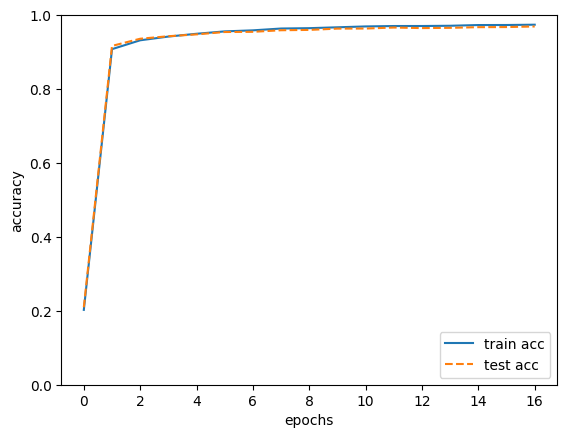

In [20]:
import matplotlib.pyplot as plt
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_accs))
plt.plot(x, train_accs, label='train acc')
plt.plot(x, test_accs, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()